In [3]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

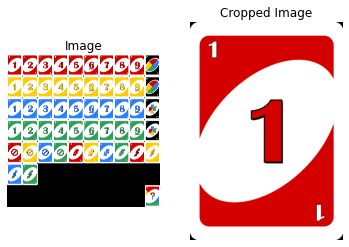

In [4]:
##image disection
image = tf.io.read_file(os.path.join('Images','UNO_Front.png'))
image = tf.image.decode_image(image, channels=3)
height = tf.shape(image)[0]
width = tf.shape(image)[1]
width_card_num = 10
width_per_card = width//width_card_num
height_card_num = 7
height_per_card = height//height_card_num
cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, height//height_card_num, width//width_card_num)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image)
ax1.set_title('Image')
ax1.axis('off')
ax2.imshow(cropped_image)
ax2.set_title('Cropped Image')
ax2.axis('off')
plt.show()
color_list = ['red', 'yellow','blue','green']#the order of colors in the image.
for heights in range(height_card_num):
    for widths in range(width_card_num):
        cropped_image = tf.image.crop_to_bounding_box(image, 0+heights*height_per_card,
                                                      0+widths*width_per_card, height_per_card, width_per_card)
        if heights<=3:
            
            color = color_list[heights]
            
            if widths <=8:
                #is a number card
                output_path = 'images/' + color+ '_'+ str(widths+1) +'.png'
                tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
            elif widths == 9:
                #is a wild card
                if heights<=1:
                    output_path = 'images/' + 'wild_'+ 'wild' +'.png'
                    tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
                else:
                    output_path = 'images/' + 'wild draw 4_'+ 'wild draw 4' +'.png'
                    tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
        elif heights ==4:
            color = color_list[widths%4]
            if widths <=3:
                #is skip
                output_path = 'images/' + color+ '_'+ 'skip' +'.png'
                tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
            elif widths >3 and widths <=7:
                #is draw 2
                output_path = 'images/' + color+ '_'+ 'draw 2' +'.png'
                tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
            else:
                #is reverse
                output_path = 'images/' + color+ '_'+ 'reverse' +'.png'
                tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
        elif heights ==5:
            if widths==0:
                #is blue reverse
                output_path = 'images/' + 'blue'+ '_'+ 'reverse' +'.png'
                tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
            elif widths ==1:
                #is a green reverse
                output_path = 'images/' + 'green'+ '_'+ 'reverse' +'.png'
                tf.io.write_file(output_path, tf.image.encode_png(cropped_image))
image = tf.io.read_file(os.path.join('Images','UNO_Zeros.png'))
image = tf.image.decode_image(image, channels=3)
height = tf.shape(image)[0]
width = tf.shape(image)[1]
width_card_num = 10
width_per_card = width//width_card_num
height_card_num = 7
height_per_card = height//height_card_num
for i in range(4):
    cropped_image = tf.image.crop_to_bounding_box(image, 0, i*width_per_card, height_per_card, width_per_card)
    color = color_list[i]
    output_path = 'images/' + color+ '_'+ '0' +'.png'
    tf.io.write_file(output_path, tf.image.encode_png(cropped_image))